# Cluster Analysis

## 1. K-Means Clustering 
### Assumptions

* The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
* Each point is closer to its own cluster center than to other cluster centers.

## 2. K-Means Algorithm: Expectation–Maximization
Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm. In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged

  E-Step: assign points to the nearest cluster center
    
  M-Step: set the cluster centers to the mean

![algorithm](algorithm.gif "algorithm")

### How to choose K for K-Means clustering?
Within Cluster Square Error

$SSE =\sum_{i=1}^{K}\sum_{x\in c_i}dist(x, c_i)^2$ 

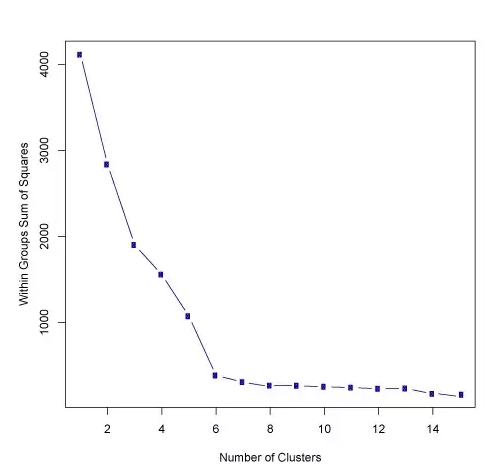

In [1]:
from IPython.display import Image
Image(filename='Elbow Plot.png')

### Limitations of K-means

* Hard assignments of data points to clusters can cause a small perturbation to a data point to flip it to another cluster.
  * Solution: GMM
* Assumes spherical clusters and equal probabilities for each cluster.  
  * Solution: GMM
* Clusters change arbitrarily for different K .
  * Solution: Hierarchical clustering
* Sensitive to outliers. 
  * Solution: Use a robust loss function.
* Works poorly on non-convex clusters.
  * Solution: Spectral clustering.


## 3. Gaussian mixture models

Probabilistic story: Each cluster is associated with a Gaussian distribution. To generate data, randomly choose a cluster k with probability $\pi_k$ and sample from its distribution.

Loss function is the negative log likelihood

## 4. Comparison between K-means & GMM

### K-means:

It is an algorithm, which classifies samples based on attributes/features into K number of clusters. Clustering or grouping of samples is done by minimizing the distance between sample and the centroid. i.e. Assign the centroid and optimize the centroid based on the distances from the points to it. This is called as Hard Assignment i.e. We are certain that particular points belong to particular centroid and then based on the least squares distance method, we will optimize the place of the centroid.

Advantages of K-Means:

1. Running Time

2. Better for high dimensional data.

3. Easy to interpret and Implement.

Disadvantages of K-Means:

1. Assumes the clusters as spherical, so does not work efficiently with complex geometrical shaped data(Mostly Non-Linear)

2. Hard Assignment might lead to mis grouping.

### Guassian Mixture:

Instead of Hard assgning data points to a cluster, if we are uncertain about the data points where they belong or to which group, we use this method. It uses probability of a sample to determine the feasibility of it belonging to a cluster.

Advantages:

1. Does not assume clusters to be of any geometry. Works well with non-linear geometric distributions as well.

2. Does not bias the cluster sizes to have specific structures as does by K-Means (Circular).

Disadvantages:

1. Uses all the components it has access to, so initialization of clusters will be difficult when dimensionality of data is high.

2. Difficult to interpret.

### Comparison
|                       K-means                                |                    GMM                               | 
|--------------------------------------------------------------|------------------------------------------------------|
|Loss function: minimize sum of squared distance               |Minimize negative log likelihood                      | 
|Hard assignment of points to clusters                         |Soft assignment of points to clusters                 | 
|Assumes spherical clusters with equal probability of a cluster|Can be used for non-spherical clusters with different probabilities|  

## 5. Hierarchical Clustering

One of the benefits of hierarchical clustering is that you don't need to already know the number of clusters k in your data in advance.

In [18]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.colors as colors

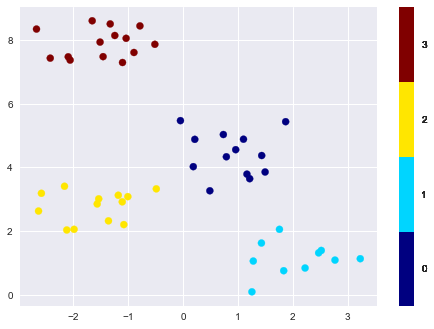

In [19]:
rng = np.random.RandomState(123)
i = rng.permutation(X.shape[0])[:50]

X_subset = X[i]
y_true_subset = y_true[i]

cmap = plt.cm.get_cmap('jet',max(y_true_subset)-min(y_true_subset)+1)
bounds = range(min(y_true_subset),max(y_true_subset)+2)
norm = colors.BoundaryNorm(bounds, cmap.N)

plt.scatter(X_subset[:, 0], X_subset[:, 1], s=50, c=y_true_subset, cmap=cmap, norm=norm)
cb=plt.colorbar(ticks=np.array(y_true_subset)+0.5)
cb.set_ticklabels(y_true_subset)
plt.show()

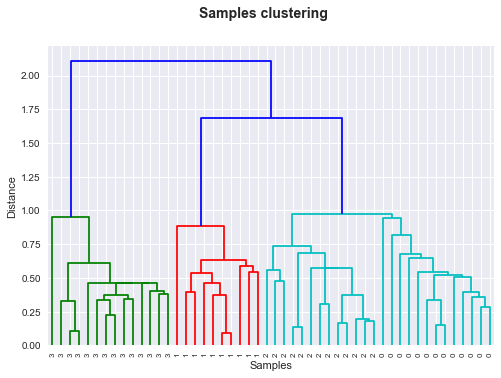

In [20]:
data_dist = pdist(X_subset)
data_link = linkage(data_dist)

dendrogram(data_link,labels=y_true_subset)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=14)
plt.show()

## K-means in scikit-learn

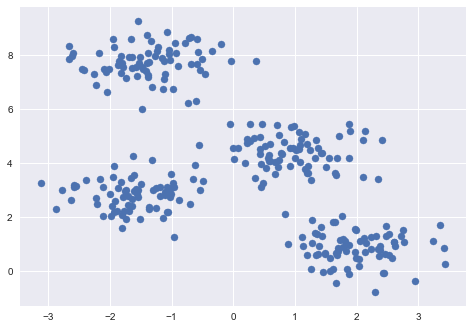

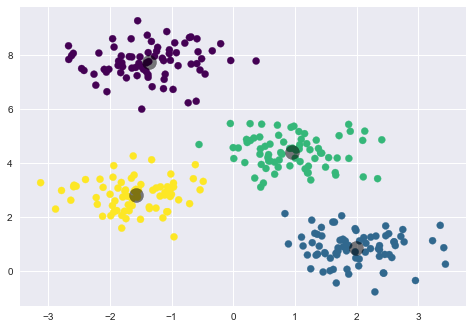

In [2]:
# Import Packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# Generate two-dimensional dataset containing four distinct blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

# k-means algorithm
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visulize the result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

## K-means from scratch

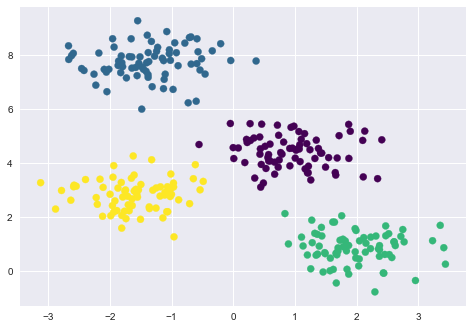

In [3]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)

plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.show()

## Reference 
* Code

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
* Different Clustering Methods

https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/clustering/slides.pdf